# Analyzing Grand Slam performances of the GOATS

#### Roger Federer, Rafael Nadal, Novak Djokovic

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Data loading

In [485]:
fed_file = r"D:/Python/working/tennis/RogerFedererGrandSlamMatches.csv"
rafa_file = r"D:/Python/working/tennis/RafaelNadalGrandSlamMatches.csv"
djoker_file = "D:/Python/working/tennis/NovakDjokovicGrandSlamMatches.csv"

In [486]:
fed_data = pd.read_csv(fed_file)
rafa_data = pd.read_csv(rafa_file)
djoker_data = pd.read_csv(djoker_file)

In [487]:
data = fed_data
data = data.append(rafa_data)
data = data.append(djoker_data)
data

,date,tournament,level,bestOf,surface,indoor,round,winner_name,winner_seed,winner_country_name,...,loser_country_name,loser_country_id,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry
0,2021-05-30,Roland Garros,G,5,C,False,R16,Matteo Berrettini,9.0,Italy,...,Switzerland,SUI,8,-10.0,2293,W/O,W/O,NaN,NaN,NaN
1,2021-05-30,Roland Garros,G,5,C,False,R32,Roger Federer,8.0,Switzerland,...,Germany,GER,57,-2.0,1884,7-6(5) 6-7(3) 7-6(4) 7-5,NaN,NaN,NaN,NaN
2,2021-05-30,Roland Garros,G,5,C,False,R64,Roger Federer,8.0,Switzerland,...,Croatia,CRO,47,-3.0,1969,6-2 2-6 7-6(4) 6-2,NaN,NaN,NaN,NaN
3,2021-05-30,Roland Garros,G,5,C,False,R128,Roger Federer,8.0,Switzerland,...,Uzbekistan,UZB,205,-2.0,1737,6-2 6-4 6-3,NaN,Q,NaN,NaN
4,2020-01-20,Australian Open,G,5,H,False,SF,Novak Djokovic,2.0,Serbia,...,Switzerland,SUI,3,-12.0,2340,7-6(1) 6-4 6-3,NaN,NaN,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2005-06-20,Wimbledon,G,5,G,False,R64,Novak Djokovic,NaN,Serbia,...,Spain,ESP,81,-21.0,1847,3-6 3-6 7-6(5) 7-6(3) 6-4,NaN,NaN,75.0,Q
353,2005-06-20,Wimbledon,G,5,G,False,R128,Novak Djokovic,NaN,Serbia,...,Argentina,ARG,68,-22.0,1875,6-3 7-6(5) 6-3,NaN,NaN,75.0,Q
354,2005-05-23,Roland Garros,G,5,C,False,R64,Guillermo Coria,8.0,Argentina,...,Serbia,SRB,153,-4.0,1722,4-6 6-2 3-2 RET,RET,Q,24.0,NaN
355,2005-05-23,Roland Garros,G,5,C,False,R128,Novak Djokovic,NaN,Serbia,...,United States,USA,71,-24.0,1901,6-0 6-0 6-3,NaN,NaN,24.0,Q


In [488]:
data.columns

Index(['date', 'tournament', 'level', 'bestOf', 'surface', 'indoor', 'round',
       'winner_name', 'winner_seed', 'winner_country_name',
       'winner_country_id', 'winner_rank', 'winner_eloRatingDelta',
       'winner_eloRating', 'loser_name', 'loser_seed', 'loser_country_name',
       'loser_country_id', 'loser_rank', 'loser_eloRatingDelta',
       'loser_eloRating', 'score', 'outcome', 'loser_entry', 'speed',
       'winner_entry'],
      dtype='object')

### Data Cleaning

In [489]:
data["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year
data["event"] = data["tournament"] + ' ' + data["year"].astype("str")

In [490]:
data = data.drop(columns=["level", "bestOf", "indoor"])
fed_data = fed_data.drop(columns=["level", "bestOf", "indoor"])
rafa_data = rafa_data.drop(columns=["level", "bestOf", "indoor"])
djoker_data = djoker_data.drop(columns=["level", "bestOf", "indoor"])

In [491]:
data

,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,winner_eloRatingDelta,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,year,event
0,2021-05-30,Roland Garros,C,R16,Matteo Berrettini,9.0,Italy,ITA,9,10.0,...,8,-10.0,2293,W/O,W/O,NaN,NaN,NaN,2021,Roland Garros 2021
1,2021-05-30,Roland Garros,C,R32,Roger Federer,8.0,Switzerland,SUI,8,3.0,...,57,-2.0,1884,7-6(5) 6-7(3) 7-6(4) 7-5,NaN,NaN,NaN,NaN,2021,Roland Garros 2021
2,2021-05-30,Roland Garros,C,R64,Roger Federer,8.0,Switzerland,SUI,8,3.0,...,47,-3.0,1969,6-2 2-6 7-6(4) 6-2,NaN,NaN,NaN,NaN,2021,Roland Garros 2021
3,2021-05-30,Roland Garros,C,R128,Roger Federer,8.0,Switzerland,SUI,8,1.0,...,205,-2.0,1737,6-2 6-4 6-3,NaN,Q,NaN,NaN,2021,Roland Garros 2021
4,2020-01-20,Australian Open,H,SF,Novak Djokovic,2.0,Serbia,SRB,2,11.0,...,3,-12.0,2340,7-6(1) 6-4 6-3,NaN,NaN,71.0,NaN,2020,Australian Open 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2005-06-20,Wimbledon,G,R64,Novak Djokovic,NaN,Serbia,SRB,128,29.0,...,81,-21.0,1847,3-6 3-6 7-6(5) 7-6(3) 6-4,NaN,NaN,75.0,Q,2005,Wimbledon 2005
353,2005-06-20,Wimbledon,G,R128,Novak Djokovic,NaN,Serbia,SRB,128,43.0,...,68,-22.0,1875,6-3 7-6(5) 6-3,NaN,NaN,75.0,Q,2005,Wimbledon 2005
354,2005-05-23,Roland Garros,C,R64,Guillermo Coria,8.0,Argentina,ARG,9,2.0,...,153,-4.0,1722,4-6 6-2 3-2 RET,RET,Q,24.0,NaN,2005,Roland Garros 2005
355,2005-05-23,Roland Garros,C,R128,Novak Djokovic,NaN,Serbia,SRB,153,81.0,...,71,-24.0,1901,6-0 6-0 6-3,NaN,NaN,24.0,Q,2005,Roland Garros 2005


### Dominance of the GOATS in Grand Slams

The Big-3 - Federer, Nadal and Djokovic - have dominated Men's tennis for the best part of two decades now. Let's analyse how successful they have been.

In [492]:
finals = data[
    (
        (data["winner_name"] == "Roger Federer") | 
        (data["winner_name"] == "Rafael Nadal") | 
        (data["winner_name"] == "Novak Djokovic")) & 
    (data["round"] == "F")
]

In [493]:
groups = finals.groupby("winner_name")

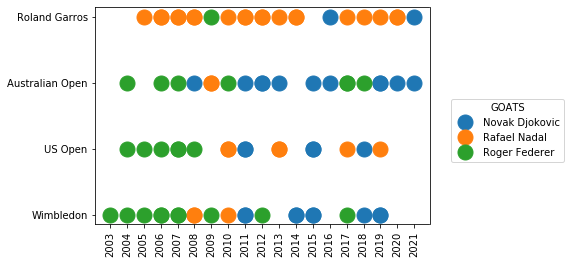

In [494]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.year, group.tournament, marker='o', linestyle='', ms=15, label=name)
plt.xticks(np.arange(finals["year"].min(), finals["year"].max()+1, 1), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 0.6), title="GOATS")
plt.show()

Above plot indicates all the grand slams won by Federer, Nadal and Djokovic.
Nadal has dominated the French Open while Federer and Djokovic have dominated Wimbledon and the Australian Open.
US Open has been the most openly contested among the three as well as other winners featuring.

Details of the titles won since 2003:
- Australian Open - Djokovic(9), Federer(6), Nadal(1), Others(3)
- French Open - Nadal(13), Djokovic(2), Federer(1), Others(3)
- Wimbledon - Federer(8), Djokovic(6), Nadal(2), Others(2), Not Held(1)
- US Open - Federer(5), Nadal(4), Djokovic(3), Others(6)

Total: Federer(20), Nadal(20), Djokovic(20), Others(14), Not held(1)

In [495]:
final_appearances = data[data["round"] == "F"]
groups = final_appearances.groupby("winner_name")

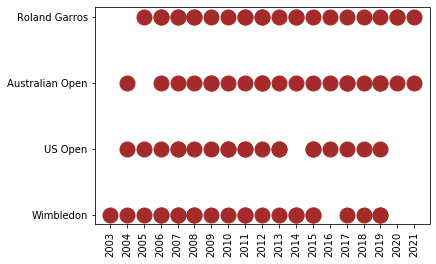

In [496]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.year, group.tournament, marker='o', linestyle='', ms=15, c="brown")
plt.xticks(np.arange(finals["year"].min(), finals["year"].max()+1, 1), rotation=90)
plt.show()

The above plot shows the grand slam finals where atleast one of the three have featured in.

None of the three have featured in the following finals (2004 onwards):
- French Open 2004: Gaston Gaudio def Guillermo Coria
- Aus Open 2005: Marat Safin def Lleyton Hewitt
- US Open 2014: Marin Cilic def Kei Nishikori
- Wimbledon 2016: Andy Murray def Milos Raonic
- US Open 2020: Dominic Thiem def Alexander Zverev

Some observations:
- The French Open has had one of the three in every final since 2005.
- Australian Open has had one of the three in every final since 2006.
- Wimbledon has had one of three in the final every year since 2003 except 2016.
- Every grand slam final from the 2005 US Open final to the 2014 Wimbledon final has featured one of the three. That is 36 finals in a row!

### Analyzing individual tournaments

In [497]:
player_markers = ["Roger Federer"] * len(fed_data) + ["Rafael Nadal"] * len(rafa_data) + ["Novak Djokovic"] * len(djoker_data)
data["player_marker"] = player_markers

In [498]:
event_groups = data.groupby(["event", "player_marker"]).size()
event_groups = event_groups.reset_index()
event_groups

,event,player_marker,0
0,Australian Open 2000,Roger Federer,3
1,Australian Open 2001,Roger Federer,3
2,Australian Open 2002,Roger Federer,4
3,Australian Open 2003,Roger Federer,4
4,Australian Open 2004,Rafael Nadal,3
...,...,...,...
201,Wimbledon 2018,Rafael Nadal,6
202,Wimbledon 2018,Roger Federer,5
203,Wimbledon 2019,Novak Djokovic,7
204,Wimbledon 2019,Rafael Nadal,6


c:\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


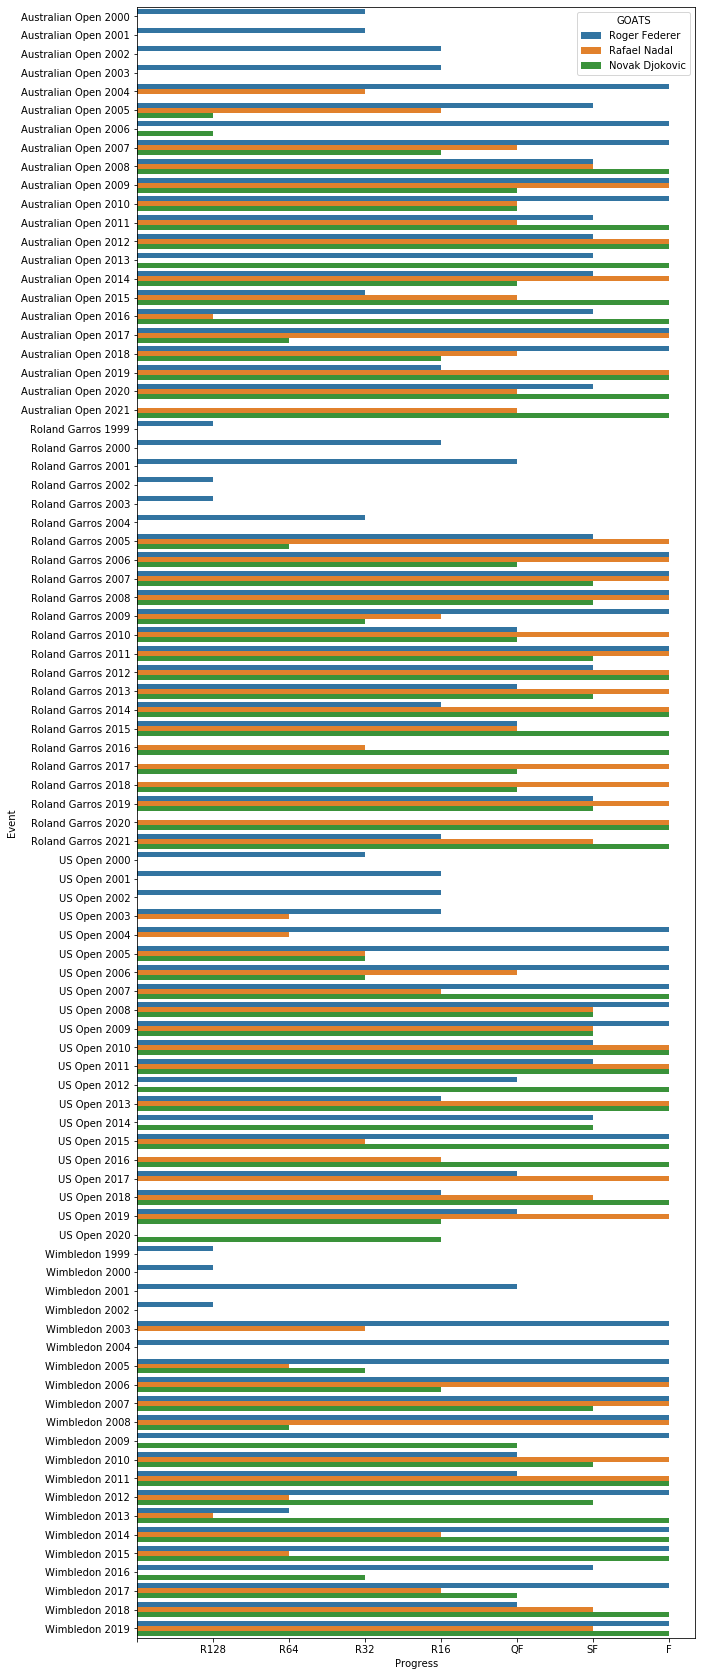

In [499]:
fig = plt.figure()
fig.set_size_inches(10, 30)
ax = sb.barplot(x=0,
           y="event",
           hue="player_marker",
           data=event_groups,
           dodge=True)
ax.set(xlabel="Progress", ylabel="Event")
ax.set_xticklabels(["", "R128", "R64", "R32", "R16", "QF", "SF", "F"])
ax.legend(title="GOATS")
fig.show()

Above plot shows the progress of the three players in every grand slam they have participated in.

Few observations:
- Nadal's weakest grand slam is Wimbledon. He hasn't passed R16 7 times in 14 attempts.
- French Open is clearly Federer's weakist grand slam although he has failed to reach the QF stage only twice in 12 attempts when Nadal has participated. He has faced defeat at the hands of Nadal 4 times in the final.
- Djokovic has been very consistent at all slams especially in the recent past. 

### Fastest to 20 Grand Slams by matches

In [500]:
fed_data = fed_data.iloc[::-1]
fed_data.reset_index(inplace=True)

rafa_data = rafa_data.iloc[::-1]
rafa_data.reset_index(inplace=True)

djoker_data = djoker_data.iloc[::-1]
djoker_data.reset_index(inplace=True)

In [501]:
for df in (fed_data, rafa_data, djoker_data):
    result = []
    for i in range(len(df)):
        result.append("W" if df.loc[i]["winner_name"] == "Roger Federer" else "L")
        match_number = list(range(1, len(df) + 1))
    df["result"] = result
    df["match_number"] = match_number

In [502]:
finals_li = []
for df, goat in zip((fed_data, rafa_data, djoker_data), ("Roger Federer", "Rafael Nadal", "Novak Djokovic")):
    finals_df = df[df["winner_name"] == goat][df["round"] == "F"]
    finals_li.append(finals_df)


c:\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [503]:
goats_dict = {}
for df in finals_li:
    goats_dict[df["winner_name"].to_list()[0]] = pd.Series(df["match_number"].to_list())
goats_win = pd.DataFrame(goats_dict)
goats_win["grand_slam_no"] = np.arange(1, 21, 1)
goats_win

,Roger Federer,Rafael Nadal,Novak Djokovic,grand_slam_no
0,52,21,52.0,1
1,63,33,115.0,2
2,73,57,128.0,3
3,80,81,135.0,4
4,99,88,142.0,5
5,106,101,169.0,6
6,113,123,208.0,7
7,127,130,221.0,8
8,134,137,235.0,9
9,141,149,242.0,10


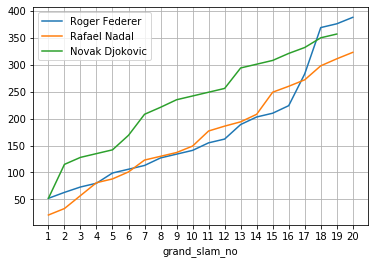

In [504]:
goats_win.plot(x="grand_slam_no", xticks=goats_win["grand_slam_no"], grid=True)

- Nadal is clearly the fastest to 20 grand slams in terms of matches played. He has done it in 323 matches played across tournaments. Federer has taken 388 while Djokovic has taken 364 matches.
- Federer got to 16 slams pretty quickly in only 283 matches and then faced a major slump which coincided with the other two dominating.
- Nadal has been consistent throughout with no major slumps. He was also the fastest among the three in terms of matches played to win a slam in only 21 matches.
- Djokovic has been very consistent since his 13th grand slam title.

### Losses at Grand Slams

In [505]:
fed_data[fed_data["winner_name"] != "Roger Federer"].groupby("winner_name").size()

winner_name
Alex Corretja             2
Andre Agassi              1
Andreas Seppi             1
Andy Murray               1
Arnaud Clement            2
David Nalbandian          2
Ernests Gulbis            1
Grigor Dimitrov           1
Gustavo Kuerten           1
Hicham Arazi              1
Jiri Novak                1
Jo Wilfried Tsonga        2
John Millman              1
Juan Carlos Ferrero       1
Juan Martin Del Potro     2
Kevin Anderson            1
Luis Horna                1
Marat Safin               1
Marin Cilic               1
Mario Ancic               1
Matteo Berrettini         1
Max Mirnyi                1
Milos Raonic              1
Novak Djokovic           11
Patrick Rafter            1
Rafael Nadal             10
Robin Soderling           1
Sergiy Stakhovsky         1
Stan Wawrinka             1
Stefanos Tsitsipas        1
Tim Henman                1
Tomas Berdych             2
Tommy Haas                1
Tommy Robredo             1
Yevgeny Kafelnikov        1
dtype: i

In [506]:
rafa_data[rafa_data["winner_name"] != "Rafael Nadal"].groupby("winner_name").size()

winner_name
Andy Murray              2
Andy Roddick             1
David Ferrer             2
Dominic Thiem            1
Dustin Brown             1
Fabio Fognini            1
Fernando Gonzalez        1
Fernando Verdasco        1
Gilles Muller            2
James Blake              1
Jo Wilfried Tsonga       1
Juan Martin Del Potro    2
Lleyton Hewitt           2
Lucas Pouille            1
Lukas Rosol              1
Marcel Granollers        1
Marin Cilic              1
Mikhail Youzhny          1
Nick Kyrgios             1
Novak Djokovic           7
Paradorn Srichaphan      1
Robin Soderling          1
Roger Federer            4
Stan Wawrinka            1
Stefanos Tsitsipas       1
Steve Darcis             1
Tomas Berdych            1
Younes El Aynaoui        1
dtype: int64

In [507]:
djoker_data[djoker_data["winner_name"] != "Novak Djokovic"].groupby("winner_name").size()

winner_name
Andy Murray               2
Andy Roddick              1
Denis Istomin             1
Dominic Thiem             2
Fernando Verdasco         1
Guillermo Coria           1
Hyeon Chung               1
Jo Wilfried Tsonga        1
Jurgen Melzer             1
Kei Nishikori             1
Lleyton Hewitt            1
Marat Safin               2
Marco Cecchinato          1
Mario Ancic               1
Pablo Carreno Busta       1
Paul Goldstein            1
Philipp Kohlschreiber     1
Rafael Nadal             10
Roger Federer             6
Sam Querrey               1
Sebastien Grosjean        1
Stan Wawrinka             4
Tomas Berdych             2
Tommy Haas                1
dtype: int64

In [508]:
fed_data[(fed_data["winner_name"] != "Roger Federer") & (fed_data["round"] == "F")].groupby("winner_name").size()

winner_name
Juan Martin Del Potro    1
Novak Djokovic           4
Rafael Nadal             6
dtype: int64

Both Nadal and Djokovic have dominated Federer in finals especially in the 2010s. Juan Martin Del Potro is the only other man to defeat Federer at a grand slam final (US Open 2008).

In [509]:
rafa_data[(rafa_data["winner_name"] != "Rafael Nadal") & (rafa_data["round"] == "F")].groupby("winner_name").size()

winner_name
Novak Djokovic    4
Roger Federer     3
Stan Wawrinka     1
dtype: int64

Stan Wawrinka remains the only man other than Federer and Djokovic to defeat Nadal at a grand slam final at the Aus Open 2014.

In [510]:
djoker_data[(djoker_data["winner_name"] != "Novak Djokovic") & (djoker_data["round"] == "F")].groupby("winner_name").size()

winner_name
Andy Murray      2
Rafael Nadal     5
Roger Federer    1
Stan Wawrinka    2
dtype: int64

Both Stan Wawrinka and Andy Murray have defeated Djokovic twice each at a final.

Djokovic seems formidable against Federer and Nadal but has lost to other players more often than Federer and Nadal have thus missing out on opportunities.

In [511]:
fed_data[(fed_data["winner_name"] != "Roger Federer") & (fed_data["winner_rank"] >10 )].sort_values(by="winner_rank")

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
25,403,2001-06-25,Wimbledon,G,QF,Tim Henman,6.0,United Kingdom,GBR,11,...,15,-14.0,2124,7-5 7-6(6) 2-6 7-6(6),NaN,NaN,66.0,NaN,L,26
43,385,2003-01-13,Australian Open,H,R16,David Nalbandian,10.0,Argentina,ARG,12,...,6,-17.0,2133,6-4 3-6 6-1 1-6 6-3,NaN,NaN,44.0,NaN,L,44
12,416,2000-08-28,US Open,H,R32,Juan Carlos Ferrero,12.0,Spain,ESP,12,...,40,-10.0,1924,7-5 7-6(6) 1-6 7-6(6),NaN,NaN,63.0,NaN,L,13
233,195,2010-06-21,Wimbledon,G,QF,Tomas Berdych,12.0,Czech Republic,CZE,13,...,2,-20.0,2339,6-4 3-6 6-1 6-4,NaN,NaN,88.0,NaN,L,234
55,373,2003-08-25,US Open,H,R16,David Nalbandian,13.0,Argentina,ARG,13,...,2,-18.0,2228,3-6 7-6(1) 6-4 6-3,NaN,NaN,58.0,NaN,L,56
20,408,2001-05-28,Roland Garros,C,QF,Alex Corretja,13.0,Spain,ESP,13,...,18,-11.0,2097,7-5 6-4 7-5,NaN,NaN,31.0,NaN,L,21
400,28,2019-01-14,Australian Open,H,R16,Stefanos Tsitsipas,14.0,Greece,GRE,15,...,3,-22.0,2361,6-7(11) 7-6(3) 7-5 7-6(5),NaN,NaN,83.0,NaN,L,401
327,101,2014-08-25,US Open,H,SF,Marin Cilic,14.0,Croatia,CRO,16,...,3,-22.0,2386,6-3 6-4 6-4,NaN,NaN,64.0,NaN,L,328
314,114,2014-05-26,Roland Garros,C,R16,Ernests Gulbis,18.0,Latvia,LAT,17,...,4,-20.0,2341,6-7(5) 7-6(3) 6-2 4-6 6-3,NaN,NaN,40.0,NaN,L,315
15,413,2001-01-15,Australian Open,H,R32,Arnaud Clement,15.0,France,FRA,18,...,29,-12.0,2015,7-6(5) 6-4 6-4,NaN,NaN,48.0,NaN,L,16


Federer has lost to players outside the top 10 24 times. Interestingly the two least ranked players to have beaten him have done so at hi favourite grand slam - Wimbledon.

In [512]:
rafa_data[(rafa_data["winner_name"] != "Rafael Nadal") & (rafa_data["winner_rank"] >10 )].sort_values(by="winner_rank")

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,speed,loser_entry,outcome,winner_entry,result,match_number
2,331,2003-06-23,Wimbledon,G,R32,Paradorn Srichaphan,12.0,Thailand,THA,11,...,76,-11.0,1844,6-4 6-4 6-2,62.0,NaN,NaN,NaN,L,3
7,326,2004-01-19,Australian Open,H,R32,Lleyton Hewitt,15.0,Australia,AUS,11,...,41,-4.0,1903,7-6(2) 7-6(5) 6-2,55.0,NaN,NaN,NaN,L,8
67,266,2007-08-27,US Open,H,R16,David Ferrer,15.0,Spain,ESP,15,...,2,-21.0,2378,6-7(3) 6-4 7-6(4) 6-2,59.0,NaN,NaN,NaN,L,68
241,92,2017-01-16,Australian Open,H,F,Roger Federer,17.0,Switzerland,SUI,17,...,9,-11.0,2288,6-4 3-6 6-1 3-6 6-3,68.0,NaN,NaN,NaN,W,242
277,56,2018-07-02,Wimbledon,G,SF,Novak Djokovic,12.0,Serbia,SRB,21,...,1,-18.0,2424,6-4 3-6 7-6(9) 3-6 10-8,82.0,NaN,NaN,NaN,L,278
4,329,2003-08-25,US Open,H,R64,Younes El Aynaoui,22.0,Morocco,MAR,21,...,45,-11.0,1889,7-6(6) 6-3 7-6(6),58.0,NaN,NaN,NaN,L,5
104,229,2009-05-25,Roland Garros,C,R16,Robin Soderling,23.0,Sweden,SWE,25,...,1,-24.0,2474,6-2 6-7(2) 6-4 7-6(2),51.0,NaN,NaN,NaN,L,105
234,99,2016-08-29,US Open,H,R16,Lucas Pouille,24.0,France,FRA,25,...,5,-21.0,2297,6-1 2-6 6-4 3-6 7-6(6),47.0,NaN,NaN,NaN,L,235
252,81,2017-07-03,Wimbledon,G,R16,Gilles Muller,16.0,Luxembourg,LUX,26,...,2,-22.0,2379,6-3 6-4 3-6 4-6 15-13,78.0,NaN,NaN,NaN,L,253
226,107,2015-08-31,US Open,H,R32,Fabio Fognini,32.0,Italy,ITA,32,...,8,-22.0,2302,3-6 4-6 6-4 6-3 6-4,68.0,NaN,NaN,NaN,L,227


Wimbledon again is clearly Nadal's weak slam. His five least ranked victors have done so at Wimbledon. Federer also has one victory against Nadal while being ranked 17 at the Aus Open final 2017. He too thus features in this list above.

In [513]:
djoker_data[(djoker_data["winner_name"] != "Novak Djokovic") & (djoker_data["winner_rank"] >10 )].sort_values(by="winner_rank")

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,speed,loser_entry,winner_entry,result,match_number
213,143,2014-08-25,US Open,H,SF,Kei Nishikori,10.0,Japan,JPN,11,...,1,-25.0,2527,6-4 1-6 7-6(4) 6-3,NaN,64.0,NaN,NaN,L,214
100,256,2010-06-21,Wimbledon,G,SF,Tomas Berdych,12.0,Czech Republic,CZE,13,...,3,-18.0,2280,6-3 7-6(9) 6-3,NaN,88.0,NaN,NaN,L,101
277,79,2017-07-03,Wimbledon,G,QF,Tomas Berdych,11.0,Czech Republic,CZE,15,...,4,-22.0,2443,7-6(2) 2-0 RET,RET,78.0,NaN,NaN,L,278
21,335,2006-08-28,US Open,H,R32,Lleyton Hewitt,15.0,Australia,AUS,17,...,23,-9.0,2031,6-3 6-1 6-2,NaN,61.0,NaN,NaN,L,22
324,32,2019-08-26,US Open,H,R16,Stan Wawrinka,23.0,Switzerland,SUI,24,...,1,-22.0,2400,6-4 7-5 2-1 RET,RET,61.0,NaN,NaN,L,325
94,262,2010-05-24,Roland Garros,C,QF,Jurgen Melzer,22.0,Austria,AUT,27,...,3,-21.0,2298,3-6 2-6 6-2 7-6(3) 6-4,NaN,45.0,NaN,NaN,L,95
5,351,2005-06-20,Wimbledon,G,R32,Sebastien Grosjean,9.0,France,FRA,27,...,128,-8.0,1790,7-5 6-4 5-7 6-4,NaN,75.0,Q,NaN,L,6
335,21,2020-08-31,US Open,H,R16,Pablo Carreno Busta,20.0,Spain,ESP,27,...,1,-24.0,2446,6-5 DEF,DEF,65.0,NaN,NaN,L,336
73,283,2009-05-25,Roland Garros,C,R32,Philipp Kohlschreiber,29.0,Germany,GER,31,...,4,-21.0,2308,6-4 6-4 6-4,NaN,51.0,NaN,NaN,L,74
78,278,2009-06-22,Wimbledon,G,QF,Tommy Haas,24.0,Germany,GER,34,...,4,-20.0,2288,7-5 7-6(6) 4-6 6-3,NaN,83.0,NaN,NaN,L,79


Djokovic has just lost once to a player outside the top 100 at a grand slam.

In [514]:
fed_data[fed_data["winner_name"] != "Roger Federer"].groupby("winner_country_name").size()

winner_country_name
Argentina              4
Australia              2
Belarus                1
Brazil                 1
Bulgaria               1
Canada                 1
Croatia                2
Czech Republic         3
France                 4
Germany                1
Greece                 1
Italy                  2
Latvia                 1
Morocco                1
Peru                   1
Russian Federation     2
Serbia                11
South Africa           1
Spain                 14
Sweden                 1
Switzerland            1
Ukraine                1
United Kingdom         2
United States          1
dtype: int64

In [515]:
rafa_data[rafa_data["winner_name"] != "Rafael Nadal"].groupby("winner_country_name").size()

winner_country_name
Argentina             2
Australia             3
Austria               1
Belgium               1
Chile                 1
Croatia               1
Czech Republic        2
France                2
Germany               1
Greece                1
Italy                 1
Luxembourg            2
Morocco               1
Russian Federation    1
Serbia                7
Spain                 4
Sweden                1
Switzerland           5
Thailand              1
United Kingdom        2
United States         2
dtype: int64

In [516]:
djoker_data[djoker_data["winner_name"] != "Novak Djokovic"].groupby("winner_country_name").size()

winner_country_name
Argentina              1
Australia              1
Austria                3
Croatia                1
Czech Republic         2
France                 2
Germany                2
Italy                  1
Japan                  1
Korea, Republic of     1
Russian Federation     2
Spain                 12
Switzerland           10
United Kingdom         2
United States          3
Uzbekistan             1
dtype: int64

### Bagels at Grand Slams

In [517]:
fed_data[
    ((fed_data["winner_name"] == "Roger Federer") & (fed_data["score"].str.contains("0-6")))|
    ((fed_data["winner_name"] != "Roger Federer") & (fed_data["score"].str.contains("6-0")))
]

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
0,428,1999-05-24,Roland Garros,C,R128,Patrick Rafter,3.0,Australia,AUS,3,...,111,-4.0,1786,5-7 6-3 6-0 6-2,NaN,WC,30.0,NaN,L,1
174,254,2008-05-25,Roland Garros,C,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-18.0,2417,6-1 6-3 6-0,NaN,NaN,41.0,NaN,L,175


In [518]:
rafa_data[
    ((rafa_data["winner_name"] == "Rafael Nadal") & (rafa_data["score"].str.contains("0-6")))|
    ((rafa_data["winner_name"] != "Rafael Nadal") & (rafa_data["score"].str.contains("6-0")))
]

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,speed,loser_entry,outcome,winner_entry,result,match_number
9,324,2004-08-30,US Open,H,R64,Andy Roddick,2.0,United States,USA,2,...,49,-5.0,1987,6-0 6-3 6-4,57.0,NaN,NaN,NaN,L,10
39,294,2006-06-26,Wimbledon,G,F,Roger Federer,1.0,Switzerland,SUI,1,...,2,-12.0,2405,6-0 7-6(5) 6-7(2) 6-3,75.0,NaN,NaN,NaN,W,40
216,117,2015-01-19,Australian Open,H,QF,Tomas Berdych,7.0,Czech Republic,CZE,7,...,3,-21.0,2404,6-2 6-0 7-6(5),72.0,NaN,NaN,NaN,L,217
282,51,2018-08-27,US Open,H,QF,Rafael Nadal,1.0,Spain,ESP,1,...,9,-4.0,2133,0-6 6-4 7-5 6-7(4) 7-6(5),61.0,NaN,NaN,NaN,L,283


In [519]:
rafa_data[rafa_data["index"] == 51]

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,speed,loser_entry,outcome,winner_entry,result,match_number
282,51,2018-08-27,US Open,H,QF,Rafael Nadal,1.0,Spain,ESP,1,...,9,-4.0,2133,0-6 6-4 7-5 6-7(4) 7-6(5),61.0,NaN,NaN,NaN,L,283


In [520]:
djoker_data[
    ((djoker_data["winner_name"] == "Novak Djokovic") & (djoker_data["score"].str.contains("0-6")))|
    ((djoker_data["winner_name"] != "Novak Djokovic") & (djoker_data["score"].str.contains("6-0")))
]

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,speed,loser_entry,winner_entry,result,match_number
0,356,2005-01-17,Australian Open,H,R128,Marat Safin,4.0,Russian Federation,RUS,4,...,188,-5.0,1656,6-0 6-2 6-1,NaN,51.0,Q,NaN,L,1
6,350,2005-08-29,US Open,H,R128,Novak Djokovic,NaN,Serbia,SRB,97,...,43,-20.0,1901,7-5 4-6 7-6(5) 0-6 7-5,NaN,63.0,NaN,NaN,L,7
272,84,2017-05-29,Roland Garros,C,QF,Dominic Thiem,6.0,Austria,AUT,7,...,2,-23.0,2457,7-6(5) 6-3 6-0,NaN,45.0,NaN,NaN,L,273
342,14,2020-09-28,Roland Garros,C,F,Rafael Nadal,1.0,Spain,ESP,2,...,1,-18.0,2442,6-0 6-2 7-5,NaN,30.0,NaN,NaN,L,343


### Head to Head

#### Federer v Nadal

In [524]:
fedal_data_fed = fed_data[(fed_data["winner_name"] == "Roger Federer") & (fed_data["loser_name"] == "Rafael Nadal")]
fedal_data_rafa = fed_data[(fed_data["loser_name"] == "Roger Federer") & (fed_data["winner_name"] == "Rafael Nadal")]

In [525]:
fedal_data_fed

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
126,302,2006-06-26,Wimbledon,G,F,Roger Federer,1.0,Switzerland,SUI,1,...,2,-12.0,2405,6-0 7-6(5) 6-7(2) 6-3,NaN,NaN,75.0,NaN,W,127
154,274,2007-06-25,Wimbledon,G,F,Roger Federer,1.0,Switzerland,SUI,1,...,2,-12.0,2410,7-6(7) 4-6 7-6(3) 2-6 6-2,NaN,NaN,73.0,NaN,W,155
368,60,2017-01-16,Australian Open,H,F,Roger Federer,17.0,Switzerland,SUI,17,...,9,-11.0,2288,6-4 3-6 6-1 3-6 6-3,NaN,NaN,68.0,NaN,W,369
412,16,2019-07-01,Wimbledon,G,SF,Roger Federer,2.0,Switzerland,SUI,3,...,2,-16.0,2422,7-6(3) 1-6 6-3 6-4,NaN,NaN,76.0,NaN,W,413


In [526]:
fedal_data_rafa

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
91,337,2005-05-23,Roland Garros,C,SF,Rafael Nadal,4.0,Spain,ESP,5,...,1,-22.0,2461,6-3 4-6 6-4 6-3,NaN,NaN,24.0,NaN,L,92
119,309,2006-05-29,Roland Garros,C,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-21.0,2487,1-6 6-1 6-4 7-6(4),NaN,NaN,34.0,NaN,L,120
147,281,2007-05-28,Roland Garros,C,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-21.0,2504,6-3 4-6 6-3 6-4,NaN,NaN,38.0,NaN,L,148
174,254,2008-05-25,Roland Garros,C,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-18.0,2417,6-1 6-3 6-0,NaN,NaN,41.0,NaN,L,175
181,247,2008-06-23,Wimbledon,G,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-16.0,2423,6-4 6-4 6-7(5) 6-7(8) 9-7,NaN,NaN,79.0,NaN,L,182
195,233,2009-01-19,Australian Open,H,F,Rafael Nadal,1.0,Spain,ESP,1,...,2,-14.0,2378,7-5 3-6 7-6(3) 3-6 6-2,NaN,NaN,53.0,NaN,L,196
252,176,2011-05-22,Roland Garros,C,F,Rafael Nadal,1.0,Spain,ESP,1,...,3,-15.0,2404,7-5 7-6(3) 5-7 6-1,NaN,NaN,46.0,NaN,L,253
269,159,2012-01-16,Australian Open,H,SF,Rafael Nadal,2.0,Spain,ESP,2,...,3,-16.0,2433,6-7(5) 6-2 7-6(5) 6-4,NaN,NaN,46.0,NaN,L,270
310,118,2014-01-13,Australian Open,H,SF,Rafael Nadal,1.0,Spain,ESP,1,...,6,-7.0,2328,7-6(4) 6-3 6-3,NaN,NaN,70.0,NaN,L,311
406,22,2019-05-27,Roland Garros,C,SF,Rafael Nadal,2.0,Spain,ESP,2,...,3,-13.0,2365,6-3 6-4 6-2,NaN,NaN,47.0,NaN,L,407


Federer and Nadal have never met before the SF stage of a grand slam.

#### Federer v Djokovic

In [527]:
fednole_data_fed = fed_data[(fed_data["winner_name"] == "Roger Federer") & (fed_data["loser_name"] == "Novak Djokovic")]
fednole_data_djoker = fed_data[(fed_data["loser_name"] == "Roger Federer") & (fed_data["winner_name"] == "Novak Djokovic")]

In [528]:
fednole_data_fed

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
137,291,2007-01-15,Australian Open,H,R16,Roger Federer,1.0,Switzerland,SUI,1,...,15,-2.0,2088,6-2 7-5 6-3,NaN,NaN,55.0,NaN,W,138
161,267,2007-08-27,US Open,H,F,Roger Federer,1.0,Switzerland,SUI,1,...,3,-7.0,2272,7-6(4) 7-6(2) 6-4,NaN,NaN,59.0,NaN,W,162
187,241,2008-08-25,US Open,H,SF,Roger Federer,2.0,Switzerland,SUI,2,...,3,-12.0,2309,6-3 5-7 7-5 6-2,NaN,NaN,64.0,NaN,W,188
215,213,2009-08-31,US Open,H,SF,Roger Federer,1.0,Switzerland,SUI,1,...,4,-9.0,2302,7-6(3) 7-5 7-5,NaN,NaN,56.0,NaN,W,216
251,177,2011-05-22,Roland Garros,C,SF,Roger Federer,3.0,Switzerland,SUI,3,...,2,-19.0,2492,7-6(5) 6-3 3-6 7-6(5),NaN,NaN,46.0,NaN,W,252
281,147,2012-06-25,Wimbledon,G,SF,Roger Federer,3.0,Switzerland,SUI,3,...,1,-16.0,2469,6-3 3-6 6-4 6-3,NaN,NaN,80.0,NaN,W,282


In [529]:
fednole_data_djoker

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,outcome,loser_entry,speed,winner_entry,result,match_number
167,261,2008-01-14,Australian Open,H,SF,Novak Djokovic,3.0,Serbia,SRB,3,...,1,-23.0,2490,7-5 6-3 7-6(5),NaN,NaN,53.0,NaN,L,168
239,189,2010-08-30,US Open,H,SF,Novak Djokovic,3.0,Serbia,SRB,3,...,2,-18.0,2361,5-7 6-1 5-7 6-2 7-5,NaN,NaN,65.0,NaN,L,240
245,183,2011-01-17,Australian Open,H,SF,Novak Djokovic,3.0,Serbia,SRB,3,...,2,-18.0,2432,7-6(3) 7-5 6-4,NaN,NaN,55.0,NaN,L,246
263,165,2011-08-29,US Open,H,SF,Novak Djokovic,1.0,Serbia,SRB,1,...,3,-9.0,2370,6-7(7) 4-6 6-3 6-2 7-5,NaN,NaN,49.0,NaN,L,264
275,153,2012-05-27,Roland Garros,C,SF,Novak Djokovic,1.0,Serbia,SRB,1,...,3,-14.0,2458,6-4 7-5 6-3,NaN,NaN,40.0,NaN,L,276
321,107,2014-06-23,Wimbledon,G,F,Novak Djokovic,1.0,Serbia,SRB,2,...,4,-8.0,2357,6-7(7) 6-4 7-6(4) 5-7 6-4,NaN,NaN,89.0,NaN,L,322
342,86,2015-06-29,Wimbledon,G,F,Novak Djokovic,1.0,Serbia,SRB,1,...,2,-9.0,2412,7-6(1) 6-7(10) 6-4 6-3,NaN,NaN,86.0,NaN,L,343
349,79,2015-08-31,US Open,H,F,Novak Djokovic,1.0,Serbia,SRB,1,...,2,-12.0,2458,6-4 5-7 6-4 6-4,NaN,NaN,68.0,NaN,L,350
355,73,2016-01-18,Australian Open,H,SF,Novak Djokovic,1.0,Serbia,SRB,1,...,3,-8.0,2450,6-1 6-2 3-6 6-3,NaN,NaN,75.0,NaN,L,356
413,15,2019-07-01,Wimbledon,G,F,Novak Djokovic,1.0,Serbia,SRB,1,...,3,-16.0,2394,7-6(5) 1-6 7-6(4) 4-6 13-12,NaN,NaN,76.0,NaN,L,414


Federer and Djokovic have met once at the R16 stage with Federer emerging victorious.

#### Nadal v Djokovic

In [532]:
rafanole_data_rafa = rafa_data[(rafa_data["winner_name"] == "Rafael Nadal") & (rafa_data["loser_name"] == "Novak Djokovic")]
rafanole_data_djoker = rafa_data[(rafa_data["loser_name"] == "Rafael Nadal") & (rafa_data["winner_name"] == "Novak Djokovic")]

In [533]:
rafanole_data_rafa

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,speed,loser_entry,outcome,winner_entry,result,match_number
30,303,2006-05-29,Roland Garros,C,QF,Rafael Nadal,2.0,Spain,ESP,2,...,63,-3.0,1974,6-4 6-4 RET,34.0,NaN,RET,NaN,L,31
55,278,2007-05-28,Roland Garros,C,SF,Rafael Nadal,2.0,Spain,ESP,2,...,6,-7.0,2198,7-5 6-4 6-2,38.0,NaN,NaN,NaN,L,56
62,271,2007-06-25,Wimbledon,G,SF,Rafael Nadal,2.0,Spain,ESP,2,...,5,-8.0,2213,3-6 6-1 4-1 RET,73.0,NaN,RET,NaN,L,63
79,254,2008-05-25,Roland Garros,C,SF,Rafael Nadal,2.0,Spain,ESP,2,...,3,-12.0,2299,6-4 6-2 7-6(3),41.0,NaN,NaN,NaN,L,80
136,197,2010-08-30,US Open,H,F,Rafael Nadal,1.0,Spain,ESP,1,...,3,-11.0,2309,6-4 5-7 6-4 6-2,65.0,NaN,NaN,NaN,L,137
176,157,2012-05-27,Roland Garros,C,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-17.0,2478,6-4 6-3 2-6 7-5,40.0,NaN,NaN,NaN,L,177
184,149,2013-05-27,Roland Garros,C,SF,Rafael Nadal,3.0,Spain,ESP,4,...,1,-13.0,2491,6-4 3-6 6-1 6-7(3) 9-7,42.0,NaN,NaN,NaN,L,185
193,140,2013-08-26,US Open,H,F,Rafael Nadal,2.0,Spain,ESP,2,...,1,-13.0,2464,6-2 3-6 6-4 6-1,54.0,NaN,NaN,NaN,L,194
207,126,2014-05-26,Roland Garros,C,F,Rafael Nadal,1.0,Spain,ESP,1,...,2,-19.0,2551,3-6 7-5 6-2 6-4,40.0,NaN,NaN,NaN,L,208
322,11,2020-09-28,Roland Garros,C,F,Rafael Nadal,1.0,Spain,ESP,2,...,1,-18.0,2442,6-0 6-2 7-5,30.0,NaN,NaN,NaN,L,323


In [534]:
rafanole_data_djoker

,index,date,tournament,surface,round,winner_name,winner_seed,winner_country_name,winner_country_id,winner_rank,...,loser_rank,loser_eloRatingDelta,loser_eloRating,score,speed,loser_entry,outcome,winner_entry,result,match_number
155,178,2011-06-20,Wimbledon,G,F,Novak Djokovic,2.0,Serbia,SRB,2,...,1,-15.0,2461,6-4 6-1 1-6 6-3,80.0,NaN,NaN,NaN,L,156
162,171,2011-08-29,US Open,H,F,Novak Djokovic,1.0,Serbia,SRB,1,...,2,-13.0,2435,6-2 6-4 6-7(3) 6-1,49.0,NaN,NaN,NaN,L,163
169,164,2012-01-16,Australian Open,H,F,Novak Djokovic,1.0,Serbia,SRB,1,...,2,-13.0,2407,5-7 6-4 6-2 6-7(5) 7-5,46.0,NaN,NaN,NaN,L,170
221,112,2015-05-24,Roland Garros,C,QF,Novak Djokovic,1.0,Serbia,SRB,1,...,7,-5.0,2342,7-5 6-3 6-1,46.0,NaN,NaN,NaN,L,222
277,56,2018-07-02,Wimbledon,G,SF,Novak Djokovic,12.0,Serbia,SRB,21,...,1,-18.0,2424,6-4 3-6 7-6(9) 3-6 10-8,82.0,NaN,NaN,NaN,L,278
290,43,2019-01-14,Australian Open,H,F,Novak Djokovic,1.0,Serbia,SRB,1,...,2,-17.0,2419,6-3 6-2 6-3,83.0,NaN,NaN,NaN,L,291
333,0,2021-05-30,Roland Garros,C,SF,Novak Djokovic,1.0,Serbia,SRB,1,...,3,-14.0,2388,3-6 6-3 7-6(4) 6-2,NaN,NaN,NaN,NaN,L,334


Djokovic and Nadal have met twice at the QF stage with both winning one apiece. All other meetings have been at semi finals or the finals.

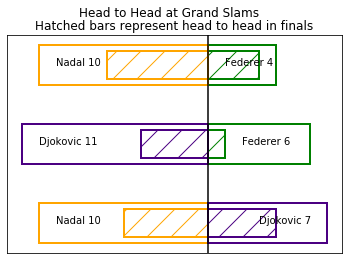

In [684]:
plt.barh(3, len(fedal_data_fed), 0.5, color="white", edgecolor="green", linewidth=2)
plt.barh(3, len(fedal_data_fed[fedal_data_fed["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="green", linewidth=2)
plt.annotate(f"Federer {len(fedal_data_fed)}", xy=(len(fedal_data_fed), 3), xytext=(len(fedal_data_fed)-3, 3), color="black")
plt.barh(3, -len(fedal_data_rafa), 0.5, color="white", edgecolor="orange", linewidth=2)
plt.barh(3, -len(fedal_data_rafa[fedal_data_rafa["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="orange", linewidth=2)
plt.annotate(f"Nadal {len(fedal_data_rafa)}", xy=(-len(fedal_data_rafa), 3), xytext=(-len(fedal_data_rafa)+1, 3), color="black")

plt.barh(2, len(fednole_data_fed), 0.5, color="white", edgecolor="green", linewidth=2)
plt.barh(2, len(fednole_data_fed[fednole_data_fed["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="green", linewidth=2)
plt.annotate(f"Federer {len(fednole_data_fed)}", xy=(len(fednole_data_fed), 2), xytext=(len(fednole_data_fed)-4, 2), color="black")
plt.barh(2, -len(fednole_data_djoker), 0.5, color="white", edgecolor="indigo", linewidth=2)
plt.barh(2, -len(fednole_data_djoker[fednole_data_djoker["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="indigo", linewidth=2)
plt.annotate(f"Djokovic {len(fednole_data_djoker)}", xy=(-len(fednole_data_djoker), 2), xytext=(-len(fednole_data_djoker)+1, 2), color="black")


plt.barh(1, -len(rafanole_data_rafa), 0.5, color="white", edgecolor="orange", linewidth=2)
plt.barh(1, -len(rafanole_data_rafa[rafanole_data_rafa["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="orange", linewidth=2)
plt.annotate(f"Nadal {len(rafanole_data_rafa)}", xy=(-len(rafanole_data_rafa), 1), xytext=(-len(rafanole_data_rafa)+1, 1), color="black")
plt.barh(1, len(rafanole_data_djoker), 0.5, color="white", edgecolor="indigo", linewidth=2)
plt.barh(1, len(rafanole_data_djoker[rafanole_data_djoker["round"] == "F"]), 0.35, hatch="/", color="white", edgecolor="indigo", linewidth=2)
plt.annotate(f"Djokovic {len(rafanole_data_djoker)}", xy=(len(rafanole_data_djoker), 1), xytext=(len(rafanole_data_djoker)-4, 1), color="black")

plt.axvline(x=0, color="black")

plt.suptitle("Head to Head at Grand Slams")
plt.title("Hatched bars represent head to head in finals")

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()

Observations regarding head to head:
- Federer has been dominated by both Nadal and Djokovic when they have met. He has lost 21/31 matches combined against the two.
- Nadal maintains a better record against Djokovic.

### Conclusion

We have been blessed to watch the three greatest tennis players of all time playing at the same time. There might be many arguments, theories, fan following in support of either of the three being the greatest of all time. But it is indeed true that this generation of GOATs might never happen once again. Let us enjoy while this lasts.